In [1]:
import pandas as pd
import numpy as np

## Exercises 1

#### Run `python -m pip install pymysql` from your terminal to install the mysql client (any folder is fine)

done.

#### cd into your exercises folder for this module and run `echo env.py >> .gitignore`

done.

#### Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [55]:
# from env.py take the variables user, password, host
from env import user, password, host

In [57]:
import os
env_exists = os.path.exists('env.py')

In [4]:
env_exists

True

In [58]:
# define a function called get_db_url
# will take in the user, host, password, and schema
# all of these will be string literals
# def get_db_url(user, host, password, db):
    # url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    # return url

# if I made this in my env file:
# I may make this a little easier on myself by formatting it this 
# way:
def create_url(db,
               user=user, 
               host=host, 
               password=password,
              env_exists=os.path.exists('env.py')):
    '''
    create_url will take in string values for
    user: a username (string literal)
    host: a host server dns or ip (string literal)
    password: a credential sequence (string literal)
    db: a mysql schema
    
    return: a formatted string that contains your formatted
    connection.  Don't put it in plaintext :)
    '''
    if env_exists:
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return 'hey I think you need credentials!'

In [6]:
my_connection = create_url('employees')

In [7]:
# if it gave me my else return we would see the word hey in there
'hey' in my_connection

False

#### Use your function to obtain a connection to the employees database.

In [8]:
# see above

#### Once you have successfully run a query:

In [9]:
query = 'SELECT * FROM employees LIMIT 10'

In [10]:
# assign df_test the results of the query and connection
df_test = pd.read_sql(query, my_connection)

In [11]:
df_test

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


#### a. Intentionally make a typo in the database url. What kind of error message do you see?

In [12]:
my_connection = create_url('bemployees')
# pd.read_sql(query, my_connection) 

#### b. Intentionally make an error in your SQL query. What does the error message look like?

In [113]:
# fix the connection back to where it was
my_connection = create_url('employees')

In [14]:
# misplaced comma:
# pd.read_sql('select *, from employees limit 5', my_connection)

#### Read the employees and titles tables into two separate DataFrames.

In [15]:
# schema: is going to be employees for both instances

In [16]:
# url: will be the same because the schema is the same
# my_connection can remain

In [114]:
# queries for titles and employees
# grab everything for each, no limitations
employees = pd.read_sql('SELECT * FROM employees', my_connection)
titles = pd.read_sql('SELECT * FROM titles', my_connection)

#### How many rows and columns do you have in each DataFrame? Is that what you expected?

In [18]:
employees.shape

(300024, 6)

In [19]:
titles.shape

(443308, 4)

In [20]:
employees.head(2)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21


#### Display the summary statistics for each DataFrame.

In [21]:
# use describe!
titles.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [22]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [23]:
employees.drop(columns='emp_no').describe()

,birth_date,first_name,last_name,gender,hire_date
count,300024,300024,300024,300024,300024
unique,4750,1275,1637,2,5434
top,1952-03-08,Shahab,Baba,M,1985-06-20
freq,95,295,226,179973,132


#### How many unique titles are in the titles DataFrame?

In [24]:
titles.drop(columns='emp_no'
           ).describe(
)['title']['unique']

7

In [25]:
# get the distinct titles
# get the length of the number of titles in the series
len(titles.title.unique())

7

In [26]:
# same thing here for the value_counts
len(titles.title.value_counts())

7

In [27]:
# or use nunique for the number of unique vals
titles.title.nunique()

7

#### What is the oldest date in the to_date column?

In [28]:
titles_non_current = pd.read_sql(
    'SELECT * FROM titles WHERE to_date < NOW()', my_connection)

In [29]:
titles_non_current

,emp_no,title,from_date,to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10005,Staff,1989-09-12,1996-09-12
2,10007,Staff,1989-02-10,1996-02-11
3,10008,Assistant Engineer,1998-03-11,2000-07-31
4,10009,Assistant Engineer,1985-02-18,1990-02-18
...,...,...,...,...
203179,499992,Staff,1987-05-10,1992-05-09
203180,499994,Engineer,1993-02-22,1993-10-27
203181,499996,Engineer,1996-05-13,2002-05-13
203182,499997,Engineer,1987-08-30,1992-08-29


In [30]:
# whats going on with this mess?
# dataframe titles
titles[
    #where
    #not: ~
    # to_date as a string
    #because im making a string comparison
    #apply: which throws a function at it
    #lambda function: in-line definition
    #look at the cell, see if 9999 is in it
    #return a boolean
    #use that as a mask
    #do the opposite with the ~ from above
    ~titles.to_date.astype(str
                          ).apply(
        lambda x: '9999' in x)]

,emp_no,title,from_date,to_date
3,10004,Engineer,1986-12-01,1995-12-01
6,10005,Staff,1989-09-12,1996-09-12
9,10007,Staff,1989-02-10,1996-02-11
10,10008,Assistant Engineer,1998-03-11,2000-07-31
11,10009,Assistant Engineer,1985-02-18,1990-02-18
...,...,...,...,...
443297,499992,Staff,1987-05-10,1992-05-09
443299,499994,Engineer,1993-02-22,1993-10-27
443301,499996,Engineer,1996-05-13,2002-05-13
443303,499997,Engineer,1987-08-30,1992-08-29


In [31]:
# if you want to really make sure something
# is being rendered as a datetime in pandas:
# (we're going to use this later in TSA)
# tpd.to_datetime(titles.to_date.).min()

In [32]:
titles.to_date.min()

datetime.date(1985, 3, 1)

In [33]:
# if we try to do subtraction here:
# we note that these are already in datetime
# format
# which means we dont need to do any conversion 
# measures
titles.to_date - titles.from_date

0         2926512 days, 0:00:00
1         2922821 days, 0:00:00
2         2923065 days, 0:00:00
3            3287 days, 0:00:00
4         2923067 days, 0:00:00
                  ...          
443303       1826 days, 0:00:00
443304    2924256 days, 0:00:00
443305    2921945 days, 0:00:00
443306       1826 days, 0:00:00
443307    2922337 days, 0:00:00
Length: 443308, dtype: object

#### What is the most recent date in the to_date column?

In [34]:
titles['to_date'].max()

datetime.date(9999, 1, 1)

In [35]:
titles_non_current['to_date'].max()

datetime.date(2002, 8, 1)

### Exercises 2

Copy the users and roles DataFrames from the examples above.

In [5]:
import numpy as np
import pandas as pd

In [6]:
# Create the users DataFrame.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users


,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [7]:
import pandas as pd

In [8]:
# Create the roles DataFrame

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


What is the result of using a right join on the DataFrames?

In [9]:
pd.merge(
    users,
    roles,
    how='right',
    right_on='id',
    left_on='role_id',
    suffixes=['_from_users','_from_roles']
)[['name_from_users', 'name_from_roles']]

,name_from_users,name_from_roles
0,bob,admin
1,joe,author
2,sally,reviewer
3,adam,reviewer
4,NaN,commenter


What is the result of using an outer join on the DataFrames?

In [10]:
pd.merge(
    users,
    roles,
    how='outer',
    right_on='id',
    left_on='role_id',
    suffixes=['_from_users','_from_roles']
)[['name_from_users', 'name_from_roles']]

,name_from_users,name_from_roles
0,bob,admin
1,joe,author
2,sally,reviewer
3,adam,reviewer
4,jane,NaN
5,mike,NaN
6,NaN,commenter


What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [13]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [14]:
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [16]:
pd.merge(
    users.drop(columns=['role_id', 'id']),
    roles.drop(columns='id'),
    how='outer',
    # right_on='id',
    # left_on='role_id',
    suffixes=['_from_users','_from_roles']
)

,name
0,bob
1,joe
2,sally
3,adam
4,jane
5,mike
6,admin
7,author
8,reviewer
9,commenter


Load the mpg dataset from PyDataset.

In [17]:
from pydataset import data
mpg = data('mpg')

Output and read the documentation for the mpg dataset.

In [18]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




How many rows and columns are in the dataset?

In [19]:
mpg.shape

(234, 11)

Check out your column names and perform any cleanup you may want on them.

In [20]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [21]:
mpg = mpg.rename(columns={'class': 'car_type'})

Display the summary statistics for the dataset.

In [22]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [27]:
mpg.dtypes == 'object'

manufacturer     True
model            True
displ           False
year            False
cyl             False
trans            True
drv              True
cty             False
hwy             False
fl               True
car_type         True
dtype: bool

In [29]:
mpg.loc[:, mpg.dtypes == 'object'].describe()

,manufacturer,model,trans,drv,fl,car_type
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


How many different manufacturers are there?

In [30]:
mpg.manufacturer.nunique()

15

In [32]:
len(mpg.groupby('manufacturer').hwy.mean())

15

How many different models are there?

In [34]:
len(mpg.model.unique())

38

Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [35]:
mpg['mileage_difference'] = \
mpg['hwy'] - mpg['cty']

Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [36]:
mpg['average_mileage'] = \
2 / ((1/mpg.hwy) + (1/mpg.cty))

Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [37]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [41]:
# lambda apply way:
mpg.trans.apply(lambda x: 'auto' in x)

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [42]:
# string method way:
mpg['is_auto'] = mpg.trans.str.contains('auto')

Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

In [44]:
mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending=False).head(1)

manufacturer
honda    27.890123
Name: average_mileage, dtype: float64

Do automatic or manual cars have better miles per gallon?

In [47]:
mpg.groupby('manufacturer').average_mileage.mean().idxmax()

'honda'



Do automatic or manual cars have better miles per gallon?


In [48]:
mpg.groupby('is_auto').average_mileage.mean()

is_auto
False    21.629229
True     18.583200
Name: average_mileage, dtype: float64

In [52]:
mpg.groupby(['manufacturer', 'is_auto']).average_mileage.agg('mean').reset_index()

,manufacturer,is_auto,average_mileage
0,audi,False,21.934373
1,audi,True,20.609476
2,chevrolet,False,19.360195
3,chevrolet,True,17.472790
4,dodge,False,13.746859
5,dodge,True,15.488530
6,ford,False,17.595195
7,ford,True,15.574059
8,honda,False,27.569154
9,honda,True,28.291335


### Exercises pt 3 we love part 3

Use your get_db_url function to help you explore the data from the chipotle database.

In [ ]:
# things we know about our chipotle database:
# schema name: chipotle (thing we will need to 
# change in our get_db_url)
# chipotle has one table, table is called orders

What is the total price for each order?

In [129]:
# get db url = 
chipotle_url = create_url('chipotle')

In [130]:
# build my query:
query = \
'''
SELECT *
FROM orders;
'''

In [131]:
# assign a dataframe to the result
# of the pd.read_sql function being passed
burrito = pd.read_sql(query, chipotle_url)

In [132]:
burrito.shape

(4622, 6)

In [133]:
burrito.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


What are the most popular 3 items?

In [144]:
burrito.groupby(
    'item_name')['quantity'].sum(
).sort_values(
    ascending=False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [142]:
burrito[['item_name','quantity']]

,item_name,quantity
0,Chips and Fresh Tomato Salsa,1
1,Izze,1
2,Nantucket Nectar,1
3,Chips and Tomatillo-Green Chili Salsa,1
4,Chicken Bowl,2
...,...,...
4617,Steak Burrito,1
4618,Steak Burrito,1
4619,Chicken Salad Bowl,1
4620,Chicken Salad Bowl,1


In [134]:
burrito.item_name.count()

4622

In [140]:
burrito.item_name.value_counts().nlargest(3)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: count, dtype: int64

In [145]:
burrito.groupby('item_name')['id'].count().head(3)

item_name
6 Pack Soft Drink    54
Barbacoa Bowl        66
Barbacoa Burrito     91
Name: id, dtype: int64

Which item has produced the most revenue?

In [149]:
burrito[
    burrito.item_name.str.contains(
        'Chick')
].sort_values(
    by='quantity', 
    ascending=False)[
    ['item_name', 
     'quantity', 
     'item_price']
]

,item_name,quantity,item_price
1254,Chicken Burrito,4,$35.00
3602,Chicken Burrito,4,$35.00
409,Chicken Bowl,3,$32.94
1514,Chicken Bowl,3,$26.25
3636,Chicken Burrito,3,$26.25
...,...,...,...
1711,Chicken Bowl,1,$11.25
1710,Chicken Burrito,1,$8.75
1708,Chicken Salad Bowl,1,$11.25
1707,Chicken Burrito,1,$8.75


In [151]:
# convert total prie for each row:
burrito['total_price'] = burrito.item_price.str.strip('$').astype(float)

In [75]:
# figure out which things produced the most money:
# convert the item price accordingly

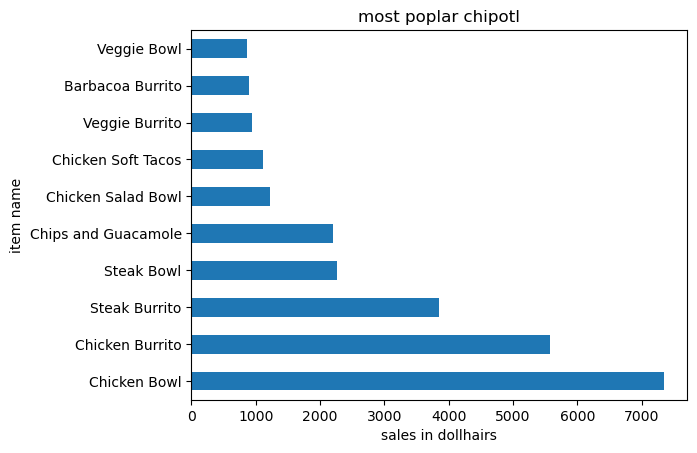

In [157]:
burrito.groupby(
    'item_name'
).total_price.sum(
).sort_values(ascending=False
             ).head(10).plot(kind='barh'
                            ).set(title='most poplar chipotl', 
                                  xlabel='sales in dollhairs', 
                                  ylabel='item name');

Join the employees and titles DataFrames together.

In [159]:
emps_titles = pd.merge(
    employees,
    titles,
    on='emp_no')

In [161]:
emps_titles.head(2)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01


For each title, find the hire date of the employee that was hired most recently with that title.

In [162]:
emps_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [163]:
query = \
'''
SELECT emp_no, d.dept_name, t.title
FROM departments d
JOIN dept_emp de 
USING (dept_no)
JOIN titles t
USING (emp_no)
WHERE t.to_date > NOW()
AND de.to_date > NOW()
'''

In [164]:
title_count_df = pd.read_sql(query, create_url('employees'))

In [166]:
title_count_df.head()

,emp_no,dept_name,title
0,10038,Customer Service,Senior Staff
1,10049,Customer Service,Senior Staff
2,10060,Customer Service,Senior Staff
3,10088,Customer Service,Senior Staff
4,10112,Customer Service,Staff


In [167]:
pd.crosstab(title_count_df.title, title_count_df.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,68,1652,0,0,0,1402,389,77,0
Engineer,627,14040,0,0,0,12081,3405,830,0
Manager,1,1,1,1,1,1,1,1,1
Senior Engineer,1790,38816,0,0,0,33625,9458,2250,0
Senior Staff,11268,1085,9545,9824,11290,1123,0,9092,28797
Staff,3574,315,2891,3073,3551,349,0,2870,8903
Technique Leader,241,5477,0,0,0,4723,1293,321,0
